In [24]:
# The Stats Part done by Lennox and vivek

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
 
df = pd.read_csv('dataset.csv')
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [25]:
df.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000
mean,1.535394,1.182623,0.688273,0.518763,13.617484,10.810661,5.973134,4.693710,6.040299,4.774733,11.276333,11.765672,1.468124,1.792431,0.062473,0.085288
std,1.305432,1.157414,0.835079,0.735357,5.356424,4.696501,3.267954,2.750045,3.110619,2.749541,3.750250,3.924179,1.217190,1.288481,0.253221,0.290183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,37.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [26]:
import pandas as pd

df = pd.read_csv('dataset.csv')
all_teams = pd.unique(df[['HomeTeam', 'AwayTeam']].values.ravel())
print(f"Total number of unique teams in the tournament: {len(all_teams)}\n")
print("List of all unique teams:")
print('\n'.join(sorted(all_teams)))

Total number of unique teams in the tournament: 46

List of all unique teams:
Arsenal
Aston Villa
Birmingham
Blackburn
Blackpool
Bolton
Bournemouth
Bradford
Brentford
Brighton
Burnley
Cardiff
Charlton
Chelsea
Coventry
Crystal Palace
Derby
Everton
Fulham
Huddersfield
Hull
Ipswich
Leeds
Leicester
Liverpool
Luton
Man City
Man United
Middlesbrough
Newcastle
Norwich
Nott'm Forest
Portsmouth
QPR
Reading
Sheffield United
Southampton
Stoke
Sunderland
Swansea
Tottenham
Watford
West Brom
West Ham
Wigan
Wolves


In [27]:
import pandas as pd

df = pd.read_csv('dataset.csv')

home_wins = df[df['FullTimeResult'] == 'H'].groupby('HomeTeam').size()
home_matches = df.groupby('HomeTeam').size()

away_wins = df[df['FullTimeResult'] == 'A'].groupby('AwayTeam').size()
away_matches = df.groupby('AwayTeam').size()

teams = set(home_matches.index) | set(away_matches.index)
stats = pd.DataFrame(index=sorted(teams))

stats['Wins'] = home_wins.add(away_wins, fill_value=0)
stats['Matches'] = home_matches.add(away_matches, fill_value=0)
stats['WinRate'] = stats['Wins'] / stats['Matches']

stats['HomeWins'] = home_wins
stats['HomeMatches'] = home_matches
stats['HomeWinRate'] = stats['HomeWins'] / stats['HomeMatches']

stats['AwayWins'] = away_wins
stats['AwayMatches'] = away_matches
stats['AwayWinRate'] = stats['AwayWins'] / stats['AwayMatches']

stats = stats.fillna(0)
stats_sorted = stats[['Wins', 'Matches', 'WinRate', 'HomeWinRate', 'AwayWinRate']].sort_values('WinRate', ascending=False)

stats_sorted.head(10)  

,Wins,Matches,WinRate,HomeWinRate,AwayWinRate
Man United,552,938,0.588486,0.678038,0.498934
Arsenal,534,937,0.569904,0.670940,0.469083
Chelsea,533,937,0.568837,0.637527,0.500000
Liverpool,530,938,0.565032,0.657388,0.473461
Man City,500,900,0.555556,0.651111,0.460000
Tottenham,440,938,0.469083,0.586354,0.351812
Everton,348,938,0.371002,0.473461,0.267666
Newcastle,315,861,0.365854,0.474419,0.257541
Brentford,53,149,0.355705,0.413333,0.297297
Leeds,92,261,0.352490,0.366412,0.338462


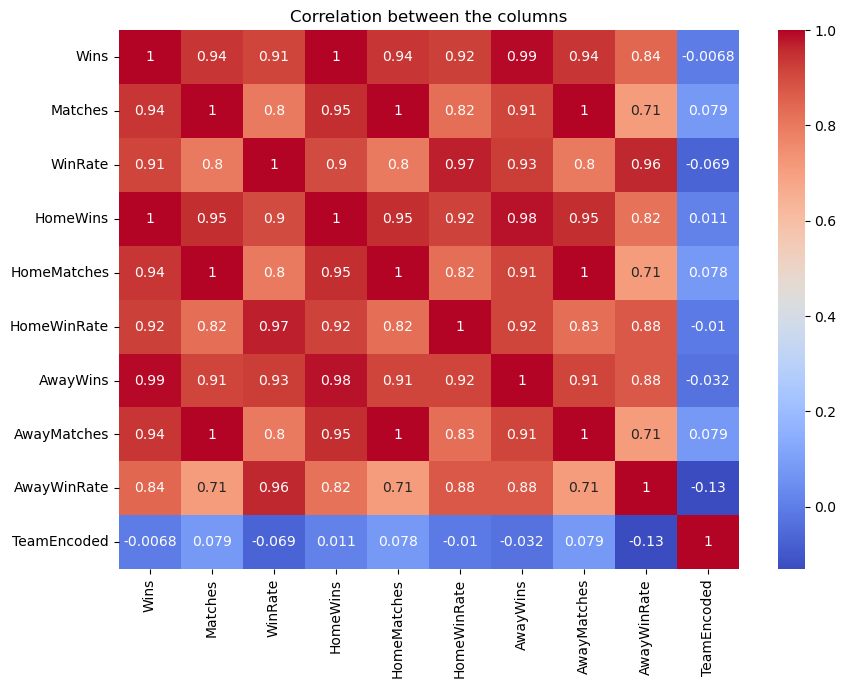

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

stats_clean = stats.dropna().copy() 

le = LabelEncoder()
stats_clean['TeamEncoded'] = le.fit_transform(stats_clean.index)


plt.figure(figsize=(10, 7))
sns.heatmap(stats_clean.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title('Correlation between the columns')
plt.show()

In [29]:
corr_with_winrate = stats_clean.corr(numeric_only=True)['WinRate'].drop('WinRate').sort_values(ascending=False)
print("Columns most correlated with WinRate:\n", corr_with_winrate)

corr_with_home = stats_clean.corr(numeric_only=True)['HomeWinRate'].drop('HomeWinRate').sort_values(ascending=False)
print("\nColumns most correlated with HomeWinRate:\n", corr_with_home)

Columns most correlated with WinRate:
 HomeWinRate    0.972524
AwayWinRate    0.963793
AwayWins       0.926636
Wins           0.914252
HomeWins       0.899700
AwayMatches    0.798082
Matches        0.797528
HomeMatches    0.796956
TeamEncoded   -0.069085
Name: WinRate, dtype: float64

Columns most correlated with HomeWinRate:
 WinRate        0.972524
Wins           0.920492
HomeWins       0.917910
AwayWins       0.915893
AwayWinRate    0.875247
AwayMatches    0.825047
Matches        0.824393
HomeMatches    0.823722
TeamEncoded   -0.010102
Name: HomeWinRate, dtype: float64


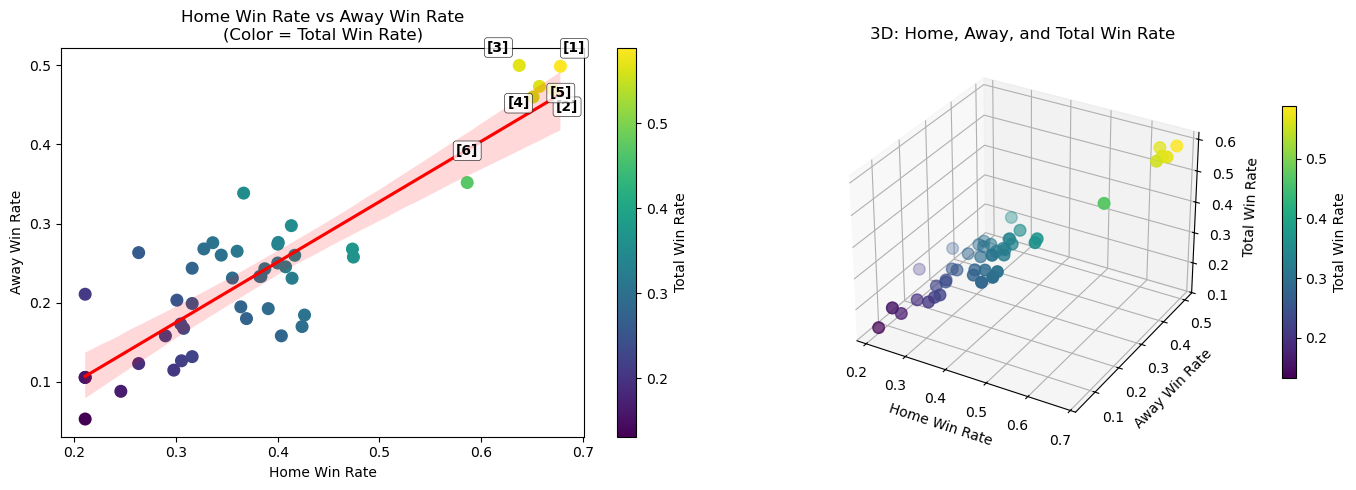

[1] = Man United
[2] = Arsenal
[3] = Chelsea
[4] = Liverpool
[5] = Man City
[6] = Tottenham


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Find top 6 teams by win rate
top6 = stats_clean.sort_values('WinRate', ascending=False).head(6)

plt.figure(figsize=(14, 5))

# --- 2D scatter plot ---
plt.subplot(1, 2, 1)
plt.title('Home Win Rate vs Away Win Rate\n(Color = Total Win Rate)')
sc = plt.scatter(
    stats_clean['HomeWinRate'],
    stats_clean['AwayWinRate'],
    c=stats_clean['WinRate'],
    cmap='viridis',
    s=70
)
# Regression line
sns.regplot(
    x='HomeWinRate', y='AwayWinRate', data=stats_clean,
    scatter=False, line_kws={'color': 'red'}
)
plt.xlabel('Home Win Rate')
plt.ylabel('Away Win Rate')
plt.colorbar(sc, label='Total Win Rate')

# Annotate top 6
offsets = [(10,10), (10,-15), (-15,10), (-15,-15), (20,0), (0,20)]
for i, (idx, row) in enumerate(top6.iterrows(), 1):
    plt.annotate(
        f"[{i}]",
        (row['HomeWinRate'], row['AwayWinRate']),
        textcoords="offset points",
        xytext=offsets[i-1],
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='black',
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="black", lw=0.5, alpha=0.8)
    )

# --- 3D scatter plot ---
ax = plt.subplot(1, 2, 2, projection='3d')
p = ax.scatter(
    stats_clean['HomeWinRate'],
    stats_clean['AwayWinRate'],
    stats_clean['WinRate'],
    c=stats_clean['WinRate'],
    cmap='viridis',
    s=70
)
ax.set_xlabel('Home Win Rate')
ax.set_ylabel('Away Win Rate')
ax.set_zlabel('Total Win Rate')
plt.title('3D: Home, Away, and Total Win Rate')
plt.colorbar(p, ax=ax, shrink=0.7, pad=0.1, label='Total Win Rate')

plt.tight_layout()
plt.show()

for i, idx in enumerate(top6.index, 1):  # indexing of the top 6 teams
    print(f"[{i}] = {idx}")